# COVID-19 History in Georgia Visualization

*Data from https://dph.georgia.gov/covid-19-daily-status-report*

In [12]:
import pandas as pd
import numpy as np
import io, os
import requests
import scipy
from zipfile import ZipFile

url = "https://ga-covid19.ondemand.sas.com/docs/ga_covid_data.zip"

#Download the latest ZIP file from the Georgia COVID-19 Status Report
r = requests.get(url, stream=True)
with open('ga_covid_data.zip', 'wb') as fd:
    for chunk in r.iter_content(chunk_size=128):
        fd.write(chunk)

with ZipFile('ga_covid_data.zip', 'r') as zip:
    zip.extractall(path='ga_covid_data')

#Load the data into a DataFrame
data = pd.read_csv('ga_covid_data/epicurve_rpt_date.csv', parse_dates=["report_date"])

data

,measure,county,report_date,cases,deaths,cases_cum,death_cum,moving_avg_cases,moving_avg_deaths,antigen_cases,probable_deaths,antigen_case_hospitalization,confirmed_case_hospitalization,antigen_cases_cum,probable_deaths_cum,total_cases,total_cases_cum,moving_avg_antigen_cases,moving_avg_probable_deaths,moving_avg_total_cases
0,state_total,Georgia,2020-02-01,0,0,0,0,0.000000,0.0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000
1,state_total,Georgia,2020-02-02,0,0,0,0,0.000000,0.0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000
2,state_total,Georgia,2020-02-03,0,0,0,0,0.000000,0.0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000
3,state_total,Georgia,2020-02-04,0,0,0,0,0.000000,0.0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000
4,state_total,Georgia,2020-02-05,0,0,0,0,0.000000,0.0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103675,county_stats,Worth,2021-10-28,0,0,1766,76,0.428571,0.0,0,0,0,0,1272,15,0,3038,1.285714,0.285714,1.714286
103676,county_stats,Worth,2021-10-29,1,0,1767,76,0.428571,0.0,1,0,0,0,1273,15,2,3040,0.571429,0.285714,1.000000
103677,county_stats,Worth,2021-10-30,1,0,1768,76,0.571429,0.0,0,0,0,0,1273,15,1,3041,0.571429,0.142857,1.142857
103678,county_stats,Worth,2021-10-31,0,0,1768,76,0.571429,0.0,1,0,0,0,1274,15,1,3042,0.714286,0.142857,1.285714


After reading the data in, let's do some basic cleansing of the data.

In [2]:
# Filter out the county statistics
df = data.filter(items=['measure', 'county', 'report_date', 'cases', 'deaths'])

# Filter out the county statistics
ga = df[df['measure'] == 'state_total']

Now we'll set the index of the data frame to the date.

In [3]:
ga

,measure,county,report_date,cases,deaths
0,state_total,Georgia,2020-02-01,0,0
1,state_total,Georgia,2020-02-02,0,0
2,state_total,Georgia,2020-02-03,0,0
3,state_total,Georgia,2020-02-04,0,0
4,state_total,Georgia,2020-02-05,0,0
...,...,...,...,...,...
635,state_total,Georgia,2021-10-28,1147,71
636,state_total,Georgia,2021-10-29,912,113
637,state_total,Georgia,2021-10-30,813,94
638,state_total,Georgia,2021-10-31,522,0


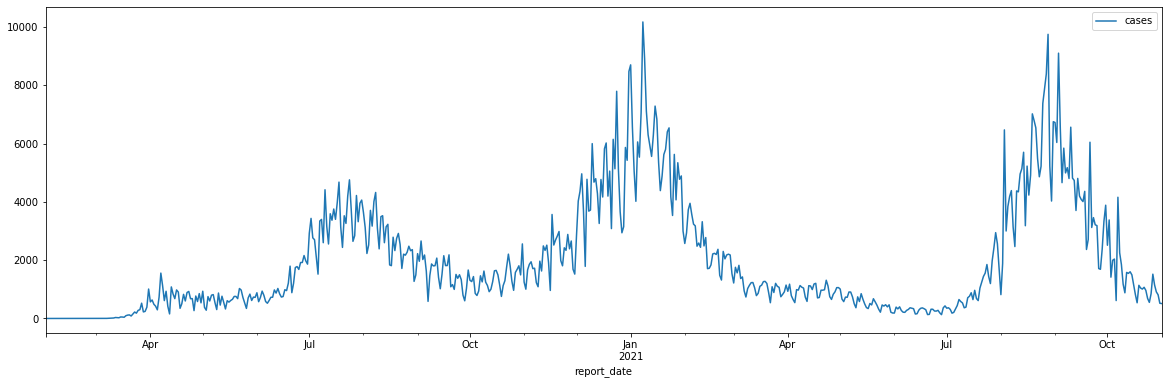

In [4]:
ga.plot(x='report_date', y='cases', figsize=(20,6))

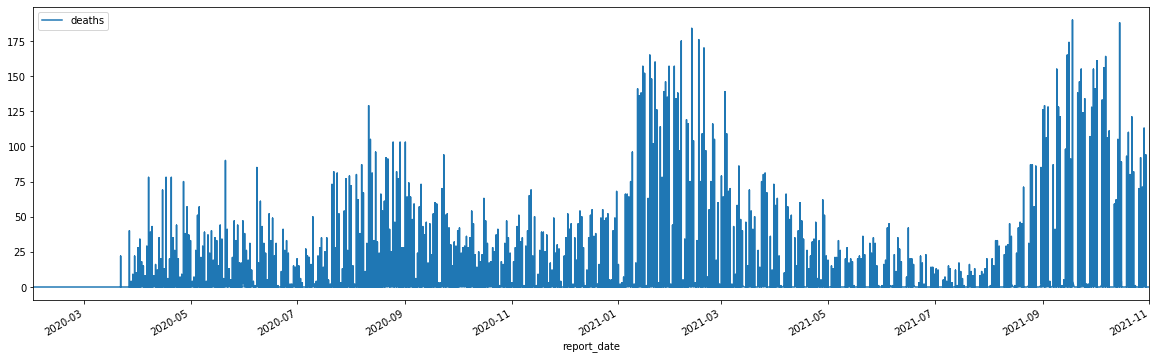

In [5]:
deaths = df.loc[:,('report_date', 'deaths')]

deaths.sort_values(by=['report_date'], ascending=True, inplace=True)

deaths.plot(x='report_date', y='deaths', figsize=(20,6))

In [6]:
#Now let's just look at Fulton County:

# Filter out the county statistics
df = data.filter(items=['measure', 'county', 'report_date', 'cases', 'deaths'])

# Filter out the county statistics
fulton = df[df['county'] == 'Fulton']

fulton

,measure,county,report_date,cases,deaths
38400,county_stats,Fulton,2020-02-01,0,0
38401,county_stats,Fulton,2020-02-02,0,0
38402,county_stats,Fulton,2020-02-03,0,0
38403,county_stats,Fulton,2020-02-04,0,0
38404,county_stats,Fulton,2020-02-05,0,0
...,...,...,...,...,...
39035,county_stats,Fulton,2021-10-28,90,3
39036,county_stats,Fulton,2021-10-29,100,9
39037,county_stats,Fulton,2021-10-30,84,4
39038,county_stats,Fulton,2021-10-31,54,0


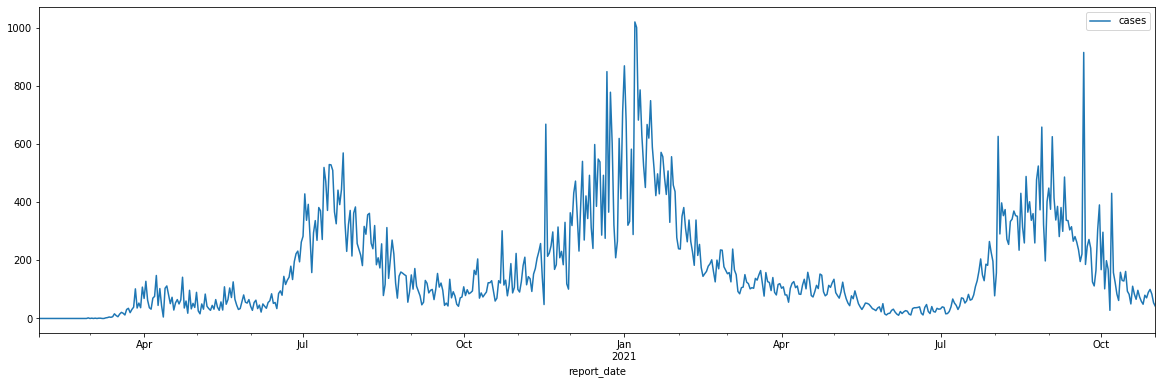

In [7]:
fulton.plot(x='report_date', y='cases', figsize=(20,6))

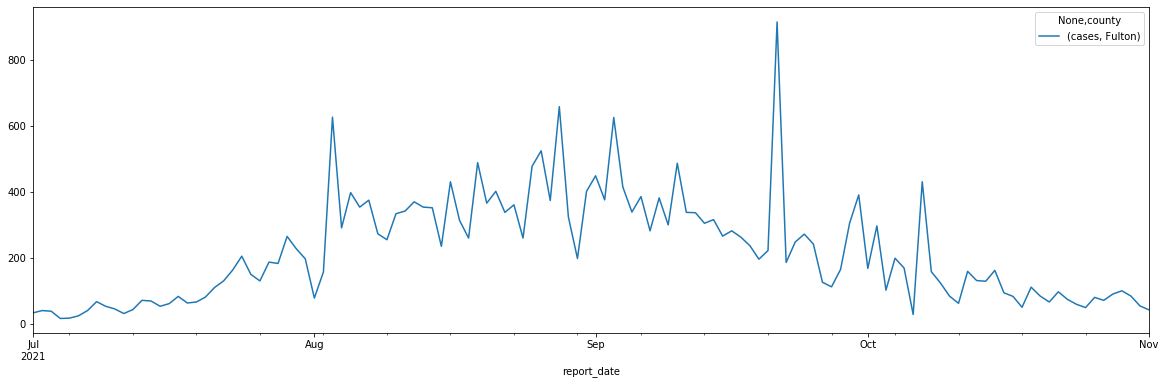

In [8]:
#Let's just plot the third wave.

cases = fulton.pivot(index='report_date', columns='county', values=['cases'])
cases["2021-07-01":].plot(figsize=(20,6))

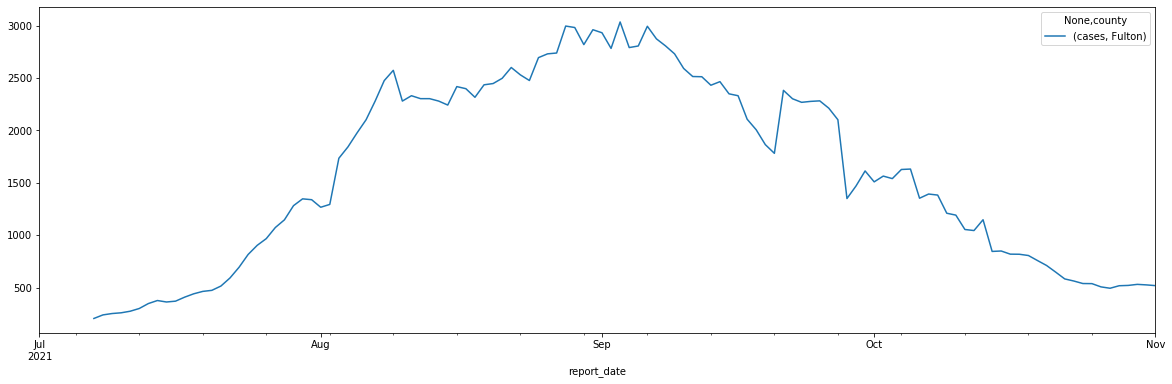

In [9]:
cases["2021-07-01":].rolling(window=7).sum().plot(figsize=(20,6))

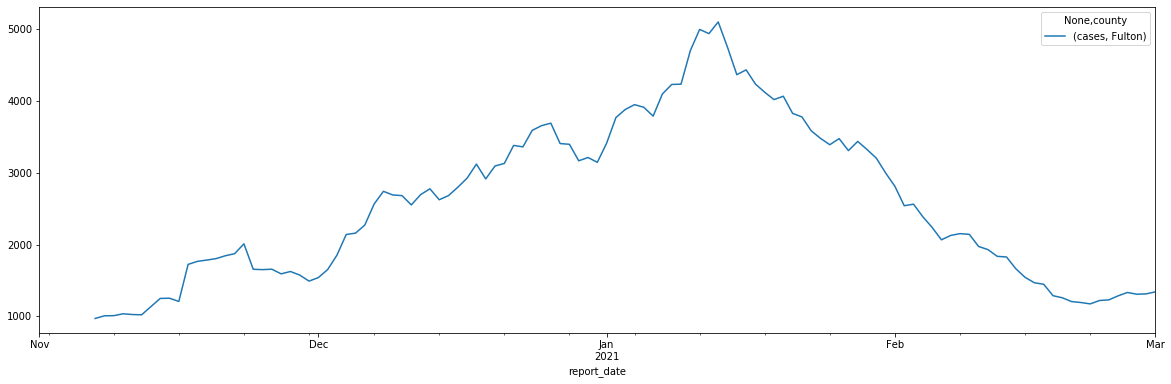

In [10]:
#Let's compare the 3rd wave to other waves.

cases["2020-11-01":"2021-03-01"].rolling(window=7).sum().plot(figsize=(20,6))

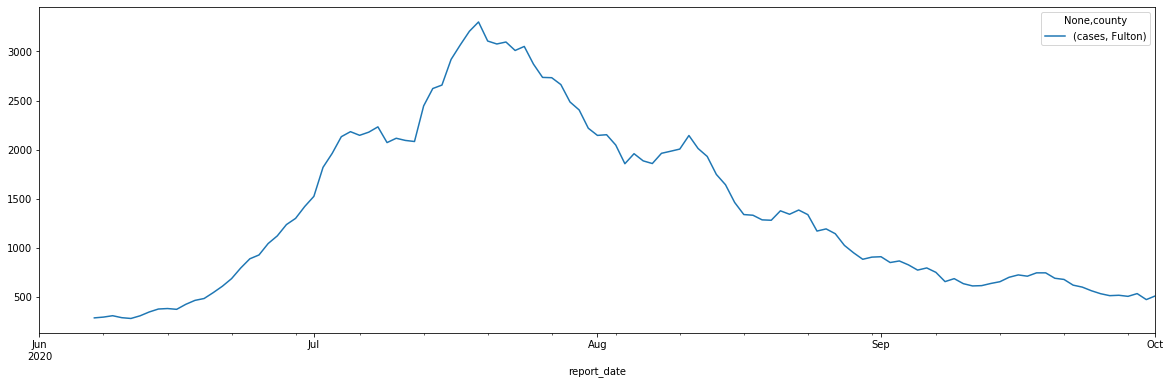

In [11]:
cases["2020-06-01":"2020-10-01"].rolling(window=7).sum().plot(figsize=(20,6))